In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage

In [28]:
def f(_focal_length, _k, _theta):
    if _k > 0:
        return _focal_length / _k * np.tan(_k * _theta)
    elif _k < 0:
        return _focal_length / _k * np.sin(_k * _theta)
    else:
        return _focal_length * _theta
    pass

# Vectorized

In [29]:
filename = '3.png'

In [30]:
img = cv2.imread(rf'{filename}')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

CPU times: user 460 ms, sys: 6.45 ms, total: 466 ms
Wall time: 444 ms


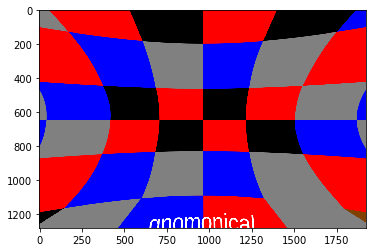

In [32]:
%%time
focal_length = 900
k = -0.5

img_shape = img.shape[:2]
source_map = np.indices(img_shape, dtype=np.int32)
cy, cx = np.array(img_shape) // 2
center = np.array([[[cy]], [[cx]]])
source_map = source_map - center
source_radius = np.sqrt(source_map[0] * source_map[0] + source_map[1] * source_map[1])
angle = np.arctan2(source_map[0], source_map[1])
# theta = source_radius / focal_length
theta = np.arctan2(source_radius, focal_length)

dist_radius = f(focal_length, k, theta)
# dist_radius = focal_length * np.sin(np.arctan2(source_radius, focal_length))

map_x = dist_radius * np.cos(angle) + cx
map_y = dist_radius * np.sin(angle) + cy
dist_img = cv2.remap(img, map_x.astype(np.float32),  map_y.astype(np.float32), cv2.INTER_LINEAR)
plt.imshow(dist_img)

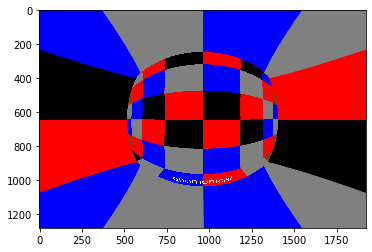

In [6]:
dist_image = np.zeros(np.array(img.shape), np.uint8)
for source_x in range(img.shape[1]):
    for source_y in range(img.shape[0]):
        dist_img[int(round(map_y[source_y][source_x]))][int(round(map_x[source_y][source_x]))] = img[source_y][source_x]
plt.imshow(dist_img)

CPU times: user 188 ms, sys: 0 ns, total: 188 ms
Wall time: 165 ms


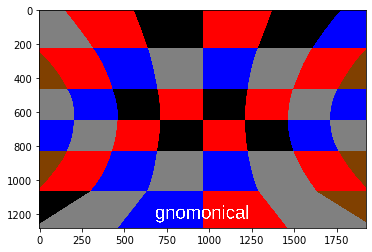

In [10]:
%%time
focal_length = 500
k = 0

img_shape = img.shape[:2]
source_map = np.indices(img_shape, dtype=np.int32)
cy, cx = np.array(img_shape) // 2
center = np.array([[[cy]], [[cx]]])
source_radius = np.sqrt(source_map[0] * source_map[0] + source_map[1] * source_map[1])

map_x = source_map[1] * (1 + k * source_radius * source_radius)
map_y = source_map[0] * (1 + k * source_radius * source_radius)

dist_img = cv2.remap(img, map_x.astype(np.float32),  map_y.astype(np.float32), cv2.INTER_LINEAR)
plt.imshow(dist_img)